# Task 1: Exploratory Data Analysis (EDA)

# Topic : Seattle Airbnb Listings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
listings_df = pd.read_csv("C:/Users/mayur/Desktop/listings.csv")
calender_df = pd.read_csv("C:/Users/mayur/Desktop/calendar.csv")
review_df = pd.read_csv("C:/Users/mayur/Desktop/reviews.csv")

In [3]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [5]:
review_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [6]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
def clean_calendar_data(calender_df):

    # Fill missing prices with 0 and remove currency symbols and commas:
    calender_df['price'].fillna(0, inplace=True)  # Fill NaN with 0
    calender_df['price'] = calender_df['price'].astype(str)  # to convert the price column into string type
    calender_df['price'] = calender_df['price'].str.replace(r'[$,]', '', regex=True)  # Remove symbols

    # Convert price to float:
    calender_df['price'] = pd.to_numeric(calender_df['price'])  # Use pd.to_numeric for better conversion

    # Convert available to numeric:
    calender_df['available'] = calender_df['available'].astype(str)   # to convert the available column into string type before applying mapping
    calender_df['available'] = calender_df['available'].map({'t': 1, 'f': 0})  # Use map for concise mapping
    
    # Extract month from date:
    calender_df['month'] = pd.to_datetime(calender_df['date']).dt.month  # Ensure datetime format first
    calender_df['year'] = pd.to_datetime(calender_df['date']).dt.year
    calender_df['Month_Year'] = pd.to_datetime(calender_df['date']).dt.to_period('M')
    

    return calender_df

cleaned_data = clean_calendar_data(calender_df) 
print(cleaned_data.head())

   listing_id        date  available  price  month  year Month_Year
0      241032  2016-01-04          1   85.0      1  2016    2016-01
1      241032  2016-01-05          1   85.0      1  2016    2016-01
2      241032  2016-01-06          0    0.0      1  2016    2016-01
3      241032  2016-01-07          0    0.0      1  2016    2016-01
4      241032  2016-01-08          0    0.0      1  2016    2016-01


In [8]:
calender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype    
---  ------      --------------    -----    
 0   listing_id  1393570 non-null  int64    
 1   date        1393570 non-null  object   
 2   available   1393570 non-null  int64    
 3   price       1393570 non-null  float64  
 4   month       1393570 non-null  int32    
 5   year        1393570 non-null  int32    
 6   Month_Year  1393570 non-null  period[M]
dtypes: float64(1), int32(2), int64(2), object(1), period[M](1)
memory usage: 63.8+ MB


       Available_Month  avg_Monthly_Price
month                                    
12            0.735573         100.958803
11            0.713986          96.879911
3             0.709187          91.233047
10            0.696514          95.444659
5             0.675670          94.281823
9             0.674402          96.612092
6             0.674384          99.453597
4             0.663847          89.683700
2             0.662208          82.308439
8             0.645051          97.181255
7             0.627097          95.377854
1             0.566937          69.683499


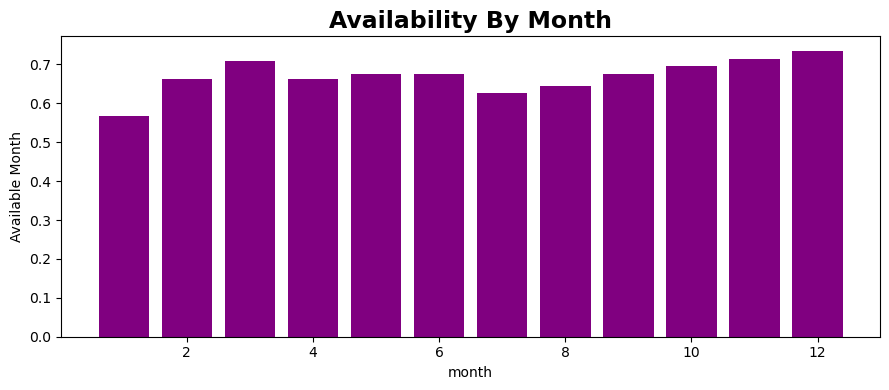

In [10]:
# 1. Create Grouped_Month DataFrame
Grouped_Month = calender_df.pivot_table(
    index='month',
    values=['price', 'available'],
    aggfunc={'price': 'mean', 'available': 'mean'}
).rename(columns={'available': 'Available_Month','price': 'avg_Monthly_Price' }).sort_values(by="Available_Month", ascending=False)

print(Grouped_Month)

# 2. Calculate average availability per month
average_availability = calender_df.groupby('month')['available'].mean().sort_values(ascending=True)

# Create bar chart with color customization
plt.figure(figsize=(9, 4))
plt.bar(average_availability.index, average_availability.values, color='purple')  # Change bar color to teal

# Customize plot elements
plt.title('Availability by Month'.title(), fontsize=17, fontweight='bold')
plt.xlabel('month')   # Label for axis
plt.ylabel('Available Month')

# Show the plot
plt.tight_layout() # Adjusts spacing b/w plot element
plt.show()

### Interpretation
<br>The business performed excellently, notably in March, November and December. <br>This is reasonable, as many travelers choose to travel to Seattle and Europe in the Christmas period, when they can experience the weather and the ambiance. <br>In addition, Seattle draws a lot of tourists in spring, as shown by the busy March.

<br>And also based on the diagram, it can be inferred that the summer holiday period (July, August) and January exhibit lower availability of listings compared to other months of the year. <br>This suggests a likelihood that customers may have made reservations in advance during these periods.

,Month_Year,Avg_Price
12,2017-01,102.142090
11,2016-12,100.958803
5,2016-06,99.453597
7,2016-08,97.181255
10,2016-11,96.879911
8,2016-09,96.612092
9,2016-10,95.444659
6,2016-07,95.377854
4,2016-05,94.281823
2,2016-03,91.233047


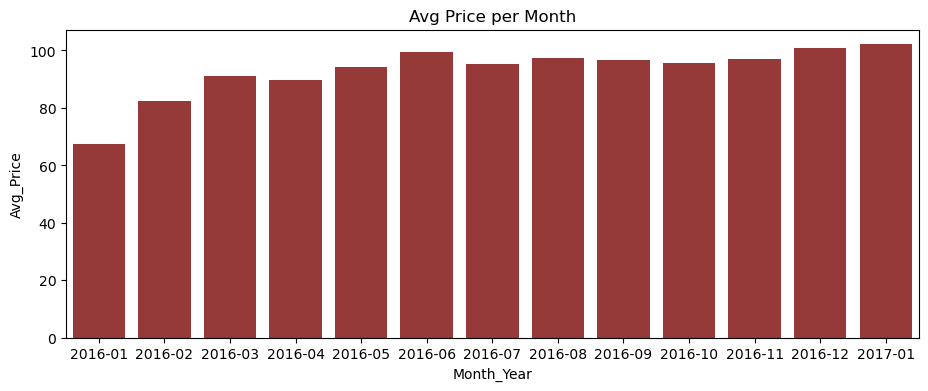

In [11]:
# 1. Calculate average price per month:
Avg_Prices = cleaned_data.groupby('Month_Year')['price'].mean().reset_index()  # Calculate and reset index
Avg_Prices = Avg_Prices.rename(columns={'price': 'Avg_Price'})  # Rename column

# 2. Create a bar plot:
plt.figure(figsize=(11,4))  # Adjust plot size
plt.title("Avg Price per Month")
sns.barplot(x='Month_Year', y='Avg_Price', data=Avg_Prices, color='brown')  # Seaborn for simple plotting

# 3. Sort values (optional):
Avg_Prices.sort_values(by='Avg_Price', ascending=False)  # Sort DataFrame

### Interpretation
The highest prices occur during the summer months of 2017-January, as reflected in the availability chart, where these months also show the lowest availability.

In [12]:
# Calculate the average price per night for each month
average_price_per_month = calender_df.groupby(['year', 'month'])['price'].mean()

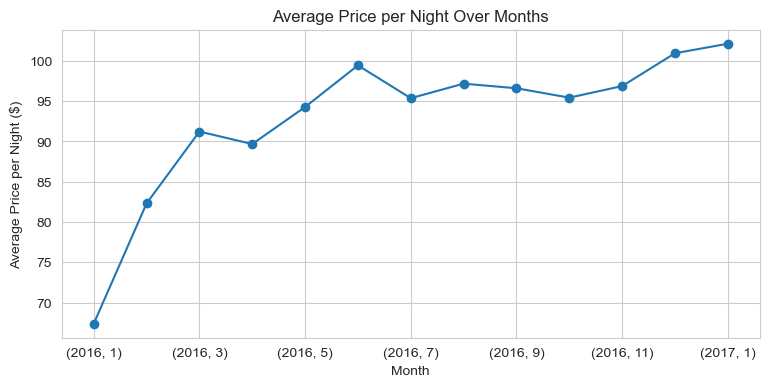

In [104]:
# Plotting
plt.figure(figsize=(9, 4))
average_price_per_month.plot(marker='o', linestyle='-')
plt.title('Average Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Night ($)')
plt.grid(True)
plt.show()

### Interpretation
<br>The average price per night shows an upward trend from January 2016 to January 2017.
<br>There is a noticeable dip in average prices in November 2016, after which the prices start to rise again.

In [14]:
# Print the first 5 rows
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [15]:
# Print The Dataset shape
listings_df.shape

(3818, 92)

In [16]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [17]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [18]:
# Drop duplicate columns
listings_df = listings_df.T.drop_duplicates().T

In [19]:
# Drop columns with full NA
listings_df.dropna(axis=1, how='all', inplace=True)

In [20]:
# Drop columns with only one unique value
listings_df.drop([c for c in listings_df.columns if listings_df[c].nunique()==1], axis=1, inplace=True)

In [21]:
# Drop columns representing url
listings_df.drop(listings_df.columns[listings_df.columns.str.contains("url")], axis=1, inplace=True)

In [22]:
# Reformat the money related columns
listings_df.price = listings_df.price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.weekly_price = listings_df.weekly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.monthly_price = listings_df.monthly_price.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.security_deposit = listings_df.security_deposit.str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.cleaning_fee = listings_df.cleaning_fee.str.replace(r"$", "").str.replace(r"$", "").str.replace(",", "").astype("float32")
listings_df.extra_people = listings_df.extra_people.str.replace(r"$","").str.replace(",","").astype("float32")

In [23]:
# Dropping specified columns with high missing values
columns_to_drop = [
    'square_feet', 'summary', 'space', 'neighborhood_overview', 'notes', 'transit',
]

# Dropping host-related information (selecting by pattern)
host_related_columns = listings_df.columns[listings_df.columns.str.contains('^host_')]
columns_to_drop.extend(host_related_columns)

# Dropping the columns
listings_df.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Listing the numerical and categorical columns
numerical_columns = listings_df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = listings_df.select_dtypes(include=object).columns.tolist()

In [25]:
# Dealing With Null Values
# Numeric columns: Use median imputation
numeric_imputer = SimpleImputer(strategy='median')
listings_df[numerical_columns] = numeric_imputer.fit_transform(listings_df[numerical_columns])

# Categorical columns with mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
listings_df[categorical_columns] = categorical_imputer.fit_transform(listings_df[categorical_columns])

In [26]:
# Summary statistics for price
listings_df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250107
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [27]:
# Average number of bedrooms
listings_df['bedrooms'].mean()

1.3072289156626506

In [28]:
# Average number of bathrooms
listings_df['bathrooms'].mean()

1.2583813514929283

In [29]:
# Average review scores rating
listings_df['review_scores_rating'].mean()

95.46464117338921

In [30]:
# Estimating occupancy rates
average_annual_availability = listings_df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate

32.938998399793334

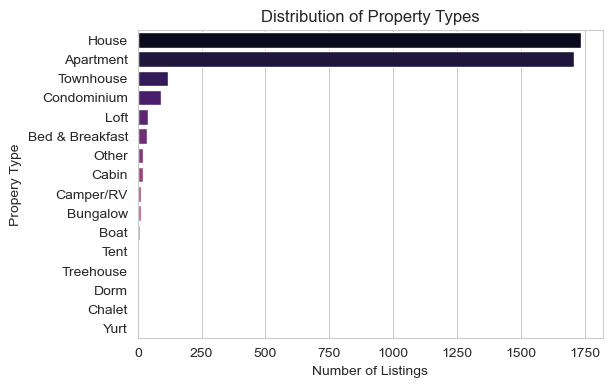

In [53]:
# Distribution of Property Types
sns.set_style("whitegrid")  # Set the aesthetic style of the plots

# Calculate teh distribution of the property types
property_type_counts = listings_df['property_type'].value_counts()

# Create a bar chart for the distribution of propery types
plt.figure(figsize=(6, 4))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="magma")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

### Interpretation
<br>Houses are the most common type of property listed on Airbnb in Seattle, with the highest number of listings.
<br>Apartments also have a significant number of listings, though fewer than houses.

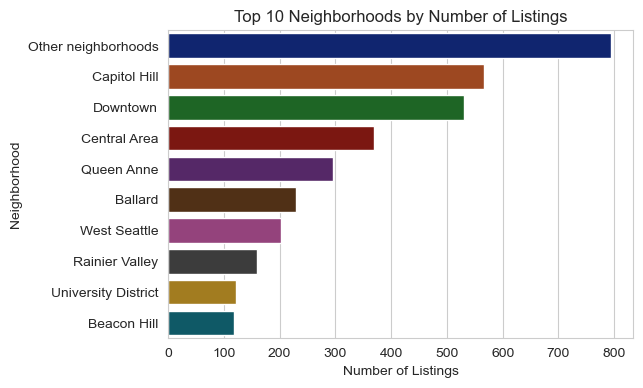

In [59]:
# Distribution of Neighborhoods
neighborhood_counts = listings_df['neighbourhood_group_cleansed'].value_counts().head(10) # Calculate the distribution of listings by neighborhood

# Create a bar chart for the top neighborhoods with the most listings
plt.figure(figsize=(6, 4))
sns.barplot(x=neighborhood_counts.values, y=neighborhood_counts.index, palette="dark")
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

### Interpretation
<br>The "Other neighborhoods" category has the highest number of listings, suggesting a large portion of listings are spread across various neighborhoods not individually listed.
<br>Capitol Hill, Downtown, Central Area, Queen Anne, and Ballard are the top five neighborhoods with the highest number of listings.

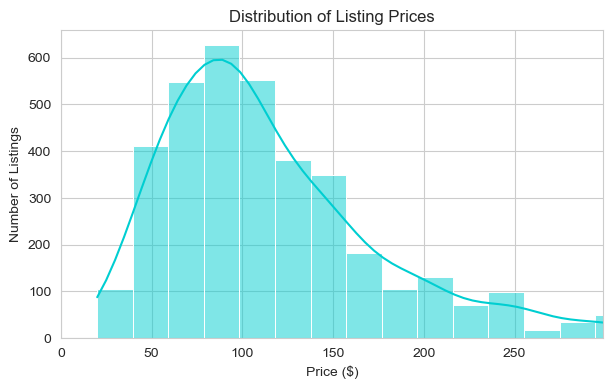

In [73]:
# Price Distribution
plt.figure(figsize=(7, 4))
sns.histplot(listings_df['price'], bins=50, kde=True, color="#00CED1")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, listings_df['price'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

### Interpretation
<br>The distribution of listing prices is right-skewed, with most listings priced between \\$50 and \\$150 per night.<br>The peak (mode) of the distribution is around \\$100 per night, where the highest number of listings is concentrated.<br>There are fewer listings priced above $150 per night, with the number of listings steadily decreasing as the price increases.

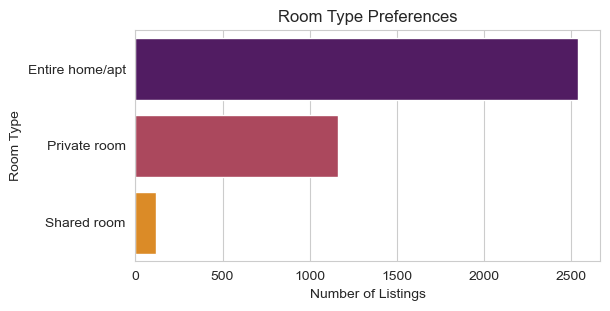

In [85]:
# Room Type Preferences
plt.figure(figsize=(6, 3))

# Set a custom color palette (e.g., "viridis", "magma", or a list of hex codes)
palette = sns.color_palette("inferno", len(listings_df['room_type'].unique()))

sns.countplot(data=listings_df, y='room_type', order=listings_df['room_type'].value_counts().index, palette=palette)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

### Interpretation
<br>The majority of listings are for entire homes/apartments, with over 2500 listings.
<br>Private rooms are the second most common, with around 1000 listings.
<br>Shared rooms are the least common, with significantly fewer listings compared to the other two categories.
<br>This suggests that guests prefer having an entire place to themselves or a private room, rather than sharing a room.

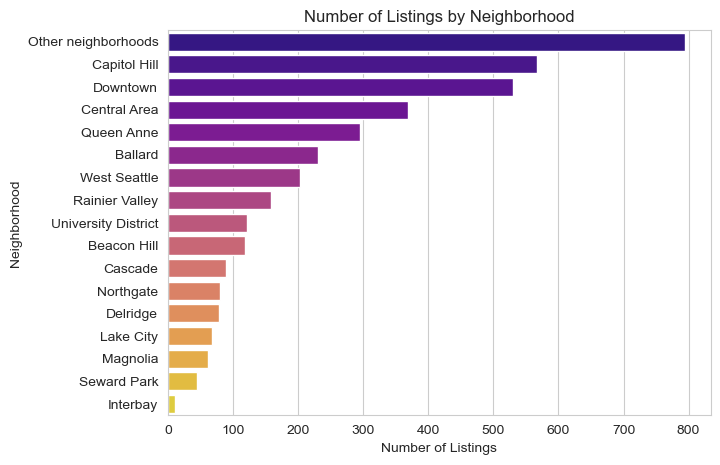

In [88]:
# Number of Listings by Neighborhood
plt.figure(figsize=(7, 5))

# Set a custom color palette (e.g., "viridis", "magma", or a list of hex codes)
palette = sns.color_palette("plasma", len(listings_df['neighbourhood_group_cleansed'].unique()))

sns.countplot(data=listings_df, y='neighbourhood_group_cleansed', order=listings_df['neighbourhood_group_cleansed'].value_counts().index, palette=palette)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

### Interpreatation
<br>"Other neighborhoods" have the highest number of listings, followed by Capitol Hill and Downtown.
<br>Central Area, Queen Anne, and Ballard also have a substantial number of listings.
<br>Neighborhoods like Seward Park and Interbay have the fewest listings.
<br>This distribution indicates that certain neighborhoods are much more popular or have a higher density of Airbnb listings compared to others.

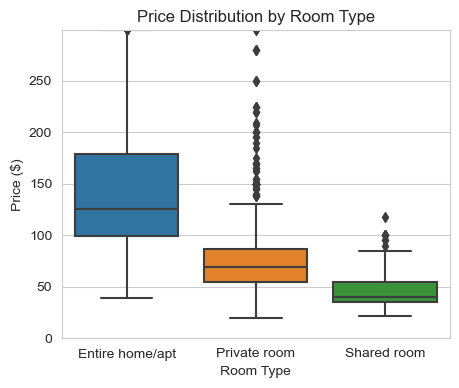

In [89]:
# Price by Room Type
plt.figure(figsize=(5, 4))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, listings_df['price'].quantile(0.95))  # Limiting y-axis to 95th percentile for better visualization
plt.show()

### Interpretation
<br>Entire homes/apartments have the highest price range, with a median price around \\$150 and several listings exceeding \\$250.
<br>Private rooms have a median price around \\$75, with fewer outliers.
<br>Shared rooms are the least expensive, with a median price below \\$50 and a tighter distribution.
<br>The variance in prices is largest for entire homes/apartments, indicating a wide range of property values and amenities offered.

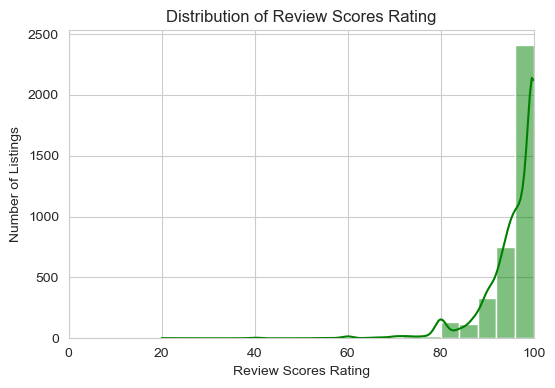

In [99]:
# Review Scores Rating Distribution
plt.figure(figsize=(6, 4))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True, color= 'green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 100)  # Review scores are typically on a scale from 0 to 100
plt.show()

### Interpretation
<br>The distribution is heavily skewed towards the higher end of yhe rating scale. Most listings have review scores between 80 and 100, with a significant peak at 100.<br> This suggests that the majority of Airbnb listings in the dataset have review scores, indicating generally positive experiences by guests

## Correlation Analysis

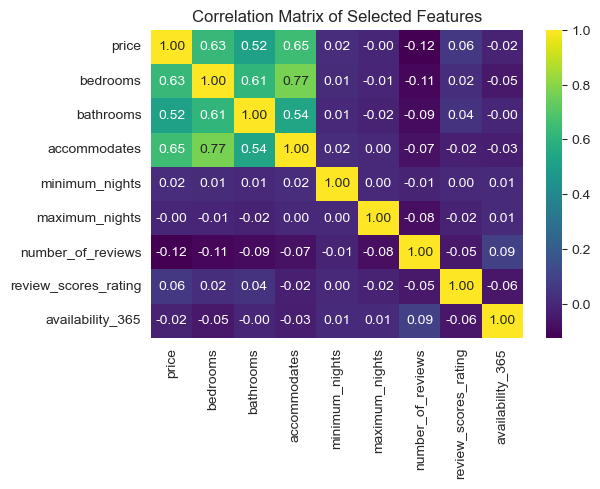

In [101]:
# Select relevant numerical columns for correlation analysis
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]
# but all of these features are in the object type, so we need to convert them
for col in numerical_columns:
    listings_df[col] = pd.to_numeric(listings_df[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = listings_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

### Interpretation
1)Price has a strong positive correlation with the number of bedrooms (0.63), bathrooms (0.52), and accommodates (0.65), suggesting that larger properties tend to be more expensive.
<br>2) The number of bedrooms is highly correlated with the accommodates feature (0.77), indicating that properties with more bedrooms can accommodate more guests.
<br>3) There is a weak negative correlation between the number of reviews and price (-0.12), indicating that properties with higher prices may have slightly fewer reviews.
<br>4) Review scores rating has little to no correlation with most features, suggesting that the overall guest satisfaction is not strongly dependent on these features.
<br>5) Minimum nights and maximum nights have negligible correlations with other features, indicating that these restrictions are likely set independently of other listing characteristics.